# The Distribution of Wealth and the MPC

This notebook presents an analogous selection of results from the paper [The Distribution of Wealth and the Marginal Propensity to Consume](http://econ.jhu.edu/people/ccarroll/papers/cstwMPC), using the [Econ-ARK/HARK](https://github.com/econ-ark/HARK) toolkit. In this version of the model, the results are presented for the estimation procedure with the **rate of return** as the key parameter of interest. 

In [1]:
# This cell does some standard python setup!

import code.calibration as parameters
import warnings  # The warnings package allows us to ignore some harmless but alarming warning messages
from code.calibration import SCF_wealth, SCF_weights
from code.estimation import (
    get_param_count,
    get_spec_name,
    get_target_ky_and_find_lorenz_distance,
    set_up_economy,
    estimate
)

from HARK.distribution import (
    expected
)

from code.estimation_dist_bounds import estimate_r_upper_given_r_lower

# Import related generic python packages
import matplotlib.pyplot as plt  # Plotting tools
import numpy as np
from HARK.utilities import get_lorenz_shares

warnings.filterwarnings("ignore")


def mystr(number):
    return f"{number:.4f}"

In [2]:
"""
This will run the absolute minimum amount of work that actually produces
relevant output-- no aggregate shocks, perpetual youth, matching net worth.
Will run both beta-point and beta-dist versions.
"""

"""
Copied here from do_min.py.
Design decisions about whether to include this code explicitly,
or import it, or execute it as is here, TBD.
"""

'\nCopied here from do_min.py.\nDesign decisions about whether to include this code explicitly,\nor import it, or execute it as is here, TBD.\n'

In [3]:
# For speed here, use the "tractable" version of the model
# This is not the "right" model, but illustrates the key point
"""
This options file specifies parameter heterogeneity, making the choice in the paper:
uniformly distributed discount factors.
"""
param_name = "Rfree"  # Which parameter to introduce heterogeneity in
dist_type = "uniform"  # Which type of distribution to use

"""
This options file specifies the "standard" work options for cstwMPC, estimating the model only.
"""
run_estimation = True  # Runs the estimation if True
# Choose which sensitivity analyses to run: rho, xi_sigma, psi_sigma, mu, urate, mortality, g, R
run_sensitivity = [False, False, False, False, False, False, False, False]
# Computes K/Y ratio for a wide range of beta; should have do_beta_dist = False
find_beta_vs_KY = False
# Uses a "tractable consumer" rather than solving full model when True
do_tractable = True

# Solve for the $\beta-Point$ (do_param_dist=False) for speed
"""
This options file establishes the second simplest model specification possible:
with heterogeneity, no aggregate shocks, perpetual youth model, matching net worth.
"""

do_param_dist = False  # Do param-dist version if True, param-point if False
do_lifecycle = False  # Use lifecycle model if True, perpetual youth if False
do_agg_shocks = False  # Solve the FBS aggregate shocks version of the model
# Matches liquid assets data when True, net worth data when False
do_liquid = False

In [4]:
options = {
    "param_name": param_name,
    "dist_type": dist_type,
    "run_estimation": run_estimation,
    "run_sensitivity": run_sensitivity,
    "find_beta_vs_KY": find_beta_vs_KY,
    "do_tractable": do_tractable,
    "do_param_dist": do_param_dist,
    "do_lifecycle": do_lifecycle,
    "do_agg_shocks": do_agg_shocks,
    "do_liquid": do_liquid,
}

In [5]:
# Here are some checks to make sure R_cusp will be defined properly
spec_name = get_spec_name(options)
param_count = get_param_count(options)
economy = set_up_economy(options, parameters, param_count)

print(economy.agents[0].Rfree)
print(economy.agents[0].DiscFac)
print(economy.agents[0].CRRA)
print(economy.agents[0].PermGroFac[0])

# Defined previously in ConsIndShockModel, but needs to be hard-coded here for now
economy.agents[0].Ex_PermShkInv = expected(lambda x: 1 / x, economy.agents[0].PermShkDstn[0])[0]

print(economy.agents[0].Ex_PermShkInv)
print(economy.agents[0].LivPrb[0]) # this one is needed for the life-cycle version of the model


1.0163522012578616
0.97
1.0
1.0
1.0032663974964733
0.99375


GPFRaw                 = 0.976162 
GPFNrm                 = 0.979350 
GPFAggLivPrb           = 0.970061 
Thorn = APF            = 0.976162 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 0.990453 
DiscFacGPFAggLivPrbMax = 0.999938 


Beginning an estimation with the specification name PYUnifrratePointIndNetWorth...
1.0063522012578616


GPFRaw                 = 1.082862 
GPFNrm                 = 1.086399 
GPFAggLivPrb           = 1.076094 
Thorn = APF            = 1.082862 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 0.892858 
DiscFacGPFAggLivPrbMax = 0.901408 


get_KY_ratio_difference tried center = 1.0063522012578616 and got -9.6345541430904
1.1163522012578617


GPFRaw                 = 0.976162 
GPFNrm                 = 0.979350 
GPFAggLivPrb           = 0.970061 
Thorn = APF            = 0.976162 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 0.990453 
DiscFacGPFAggLivPrbMax = 0.999938 


get_KY_ratio_difference tried center = 1.1163522012578617 and got 395459849006.90906
1.0063522012605415


GPFRaw                 = 1.002837 
GPFNrm                 = 1.006112 
GPFAggLivPrb           = 0.996569 
Thorn = APF            = 1.002837 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 0.964107 
DiscFacGPFAggLivPrbMax = 0.973340 


get_KY_ratio_difference tried center = 1.0063522012605415 and got -9.634554143057901
1.0338522964283747


GPFRaw                 = 1.002837 
GPFNrm                 = 1.006112 
GPFAggLivPrb           = 0.996569 
Thorn = APF            = 1.002837 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 0.964107 
DiscFacGPFAggLivPrbMax = 0.973340 


get_KY_ratio_difference tried center = 1.0338522964283747 and got -7.409844495501105
1.0338522964314665


GPFRaw                 = 1.042849 
GPFNrm                 = 1.046256 
GPFAggLivPrb           = 1.036331 
Thorn = APF            = 1.042849 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 0.927116 
DiscFacGPFAggLivPrbMax = 0.935994 


get_KY_ratio_difference tried center = 1.0338522964314665 and got -7.409844493169697
1.0751022488446642


GPFRaw                 = 1.012368 
GPFNrm                 = 1.015675 
GPFAggLivPrb           = 1.006041 
Thorn = APF            = 1.012368 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 0.955030 
DiscFacGPFAggLivPrbMax = 0.964176 


get_KY_ratio_difference tried center = 1.0751022488446642 and got 400052.8790925666
1.0436785041428347


GPFRaw                 = 1.006193 
GPFNrm                 = 1.009479 
GPFAggLivPrb           = 0.999904 
Thorn = APF            = 1.006193 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 0.960892 
DiscFacGPFAggLivPrbMax = 0.970093 


get_KY_ratio_difference tried center = 1.0436785041428347 and got 34.681553881907305
1.0373119425306532


GPFRaw                 = 1.006997 
GPFNrm                 = 1.010286 
GPFAggLivPrb           = 1.000703 
Thorn = APF            = 1.006997 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 0.960124 
DiscFacGPFAggLivPrbMax = 0.969319 


get_KY_ratio_difference tried center = 1.0373119425306532 and got -1.591402273515488
1.0381407730652257


GPFRaw                 = 1.006595 
GPFNrm                 = 1.009883 
GPFAggLivPrb           = 1.000303 
Thorn = APF            = 1.006595 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 0.960508 
DiscFacGPFAggLivPrbMax = 0.969706 


get_KY_ratio_difference tried center = 1.0381407730652257 and got 0.8648052602027949
1.0377263577979394


GPFRaw                 = 1.006730 
GPFNrm                 = 1.010018 
GPFAggLivPrb           = 1.000437 
Thorn = APF            = 1.006730 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 0.960379 
DiscFacGPFAggLivPrbMax = 0.969576 


get_KY_ratio_difference tried center = 1.0377263577979394 and got -0.41731496892270314
1.037865495265322


GPFRaw                 = 1.006729 
GPFNrm                 = 1.010017 
GPFAggLivPrb           = 1.000437 
Thorn = APF            = 1.006729 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 0.960380 
DiscFacGPFAggLivPrbMax = 0.969576 


get_KY_ratio_difference tried center = 1.037865495265322 and got 0.0008749449132050557
1.0378649130531963


GPFRaw                 = 1.006729 
GPFNrm                 = 1.010018 
GPFAggLivPrb           = 1.000437 
Thorn = APF            = 1.006729 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 0.960379 
DiscFacGPFAggLivPrbMax = 0.969576 


get_KY_ratio_difference tried center = 1.0378649130531963 and got -0.000962285411659991
1.037865204159259
Estimate is center=1.037865204159259, spread=0.0, took 35.73432803153992 seconds.
Running in interactive shell (Jupyter notebook or spyder)


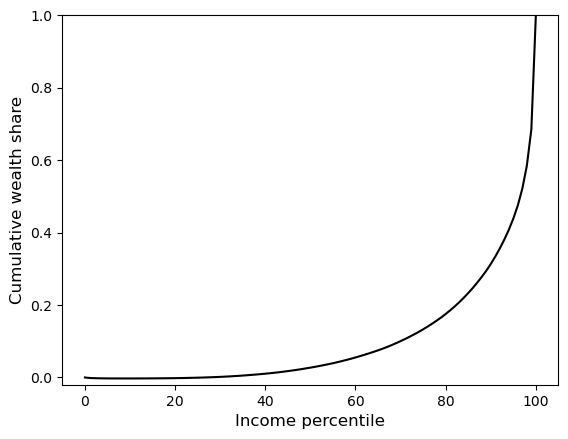

AttributeError: 'DoWMarket' object has no attribute 'center_estimate'

In [6]:
EstimationEconomy_bounds = estimate_r_upper_given_r_lower(options, parameters)

In [ ]:
# Construct the Lorenz curves and plot them

pctiles = np.linspace(0.001, 0.999, 15)
SCF_Lorenz_points = get_lorenz_shares(
    SCF_wealth, weights=SCF_weights, percentiles=pctiles
)

sim_wealth = EstimationEconomy.reap_state["aLvl"][0]
sim_Lorenz_points = get_lorenz_shares(sim_wealth, percentiles=pctiles)

# Plot
plt.figure(figsize=(5, 5))
plt.title("Wealth Distribution")
plt.plot(pctiles, SCF_Lorenz_points, "--k", label="SCF")
plt.plot(pctiles, sim_Lorenz_points, "-b", label="R-Point")
plt.plot(pctiles, pctiles, "g-.", label="45 Degree")
plt.xlabel("Percentile of net worth")
plt.ylabel("Cumulative share of wealth")
plt.legend(loc=2)
plt.ylim([0, 1])
plt.show("wealth_distribution_1")

## Return Preference Heterogeneneity

The analog to the CSTW (link to paper/notebook) work is referred to as the $\Rfree$-Dist model. Here, households no longer have the same rate of return to their assets. Instead, the model assumes that, for some dispersion $\nabla$, the rate of return to assets are distributed uniformly in the population between
$\grave{\Rfree}-\nabla$ and $\grave{\Rfree}+\nabla$. 

From here, using simulations, we search for the values of $\grave{\Rfree}$ and
$\nabla$ for which the model best matches the fraction of net worth held by the top $20$, $40$, $60$, and $80$ percent of the population, while at the same time matching
the aggregate capital-to-output ratio from the perfect foresight
model. For a description of the optimization problem that describes this structural estimation procedure, see (Link to the CSTW notebook). 

The solution to this problem assuming ex-ante heterogeneity in the rate of return is $\{\grave{\Rfree}, \nabla\}=\{1.03218, 0.01332\}$, so that the rate of return to assets is evenly spread roughly between 1.0189 and 1.0455.

Thus, much like the model with time preference heterogeneity, the introduction of even such a relatively modest amount of heterogeneity in the rate of return to assets sharply improves the model's fit to the targeted
proportions of wealth holdings, bringing it reasonably in line with the data. 

In fact, the fit here is better than the analogous, estimation under the simplest specification of the model with heterogeneous time preferences: the *Lorenz distance* in that model is $4.75$, while here it is $2.07$.


In [7]:
"""
This options file establishes the second simplest model specification possible:
with heterogeneity, no aggregate shocks, perpetual youth model, matching net worth.
"""
do_param_dist = True  # Do param-dist version if True, param-point if False
do_lifecycle = False  # Use lifecycle model if True, perpetual youth if False
do_agg_shocks = False  # Solve the FBS aggregate shocks version of the model
do_liquid = False  # Matches liquid assets data when True, net worth data when False
do_tractable = False  #

In [8]:
options = {
    "param_name": param_name,
    "dist_type": dist_type,
    "run_estimation": run_estimation,
    "run_sensitivity": run_sensitivity,
    "find_beta_vs_KY": find_beta_vs_KY,
    "do_tractable": do_tractable,
    "do_param_dist": do_param_dist,
    "do_lifecycle": do_lifecycle,
    "do_agg_shocks": do_agg_shocks,
    "do_liquid": do_liquid,
    "do_combo_estimation": True,
}


Beginning an estimation with the specification name PYUnifrrateDistIndNetWorth...
0.4378597684322482
0.5285846315155105
0.6193094945987728
0.7100343576820352
0.8007592207652975
0.8914840838485598
0.982208946931822


GPFRaw                 = 0.512727 
GPFNrm                 = 0.514402 
GPFAggLivPrb           = 0.509523 
Thorn = APF            = 0.512727 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.885685 
DiscFacGPFAggLivPrbMax = 1.903743 
GPFRaw                 = 0.864740 
GPFNrm                 = 0.867564 
GPFAggLivPrb           = 0.859335 
Thorn = APF            = 0.864740 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.118073 
DiscFacGPFAggLivPrbMax = 1.128780 
GPFRaw                 = 0.424724 
GPFNrm                 = 0.426111 
GPFAggLivPrb           = 0.422069 
Thorn = APF            = 0.424724 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
GPFRaw                 = 0.776736 
VAF                    = 0.963938 
WRPF                

get_KY_ratio_difference tried center = 0.7100343576820352 and got -10.150963311987105
find_lorenz_distance_at_target_KY tried spread = 0.31753702079141816 and got 4.439181472885911
0.6631095563607374
0.7191806059165399
0.7752516554723423
0.8313227050281448
0.8873937545839472
0.9434648041397496
0.9995358536955521


GPFRaw                 = 0.643216 
GPFNrm                 = 0.645317 
GPFAggLivPrb           = 0.639196 
Thorn = APF            = 0.643216 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.503137 
DiscFacGPFAggLivPrbMax = 1.517531 
GPFRaw                 = 0.697605 
GPFNrm                 = 0.699884 
GPFAggLivPrb           = 0.693245 
Thorn = APF            = 0.697605 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.385944 
DiscFacGPFAggLivPrbMax = 1.399216 
GPFRaw                 = 0.751994 
GPFNrm                 = 0.754450 
GPFAggLivPrb           = 0.747294 
Thorn = APF            = 0.751994 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.8313227050281448 and got -10.07667966810389
find_lorenz_distance_at_target_KY tried spread = 0.1962486734453085 and got 14.974815655924122
0.2986477435337359
0.41078984121676937
0.5229319388998028
0.6350740365828362
0.7472161342658696
0.859358231948903
0.9715003296319366


GPFRaw                 = 0.289688 
GPFNrm                 = 0.290635 
GPFAggLivPrb           = 0.287878 
Thorn = APF            = 0.289688 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 3.337525 
DiscFacGPFAggLivPrbMax = 3.369486 
GPFRaw                 = 0.398466 
GPFNrm                 = 0.399768 
GPFAggLivPrb           = 0.395976 
Thorn = APF            = 0.398466 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 2.426409 
DiscFacGPFAggLivPrbMax = 2.449645 
GPFRaw                 = 0.616022 
GPFNrm                 = 0.618034 
GPFAggLivPrb           = 0.612172 
Thorn = APF            = 0.616022 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
GPFRaw              

get_KY_ratio_difference tried center = 0.6350740365828362 and got -10.174280037322788
find_lorenz_distance_at_target_KY tried spread = 0.392497341890617 and got 8.111998135425898
0.44592123820006846
0.5354058751652047
0.6248905121303407
0.7143751490954768
0.8038597860606129
0.893344423025749
0.9828290599908852


GPFRaw                 = 0.432544 
GPFNrm                 = 0.433956 
GPFAggLivPrb           = 0.429840 
Thorn = APF            = 0.432544 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 2.235247 
DiscFacGPFAggLivPrbMax = 2.256653 
GPFRaw                 = 0.519344 
GPFNrm                 = 0.521040 
GPFAggLivPrb           = 0.516098 
Thorn = APF            = 0.519344 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.861661 
DiscFacGPFAggLivPrbMax = 1.879489 
GPFRaw                 = 0.606144 
GPFNrm                 = 0.608124 
GPFAggLivPrb           = 0.602355 
Thorn = APF            = 0.606144 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.7143751490954768 and got -10.14931438632176
find_lorenz_distance_at_target_KY tried spread = 0.3131962293779764 and got 4.352319185198916
0.5288797937780179
0.6056015760388541
0.6823233582996903
0.7590451405605265
0.8357669228213628
0.9124887050821989
0.9892104873430352


GPFRaw                 = 0.513013 
GPFNrm                 = 0.514689 
GPFAggLivPrb           = 0.509807 
Thorn = APF            = 0.513013 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.884633 
DiscFacGPFAggLivPrbMax = 1.902681 
GPFRaw                 = 0.587434 
GPFNrm                 = 0.589352 
GPFAggLivPrb           = 0.583762 
Thorn = APF            = 0.587434 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.645875 
DiscFacGPFAggLivPrbMax = 1.661636 
GPFRaw                 = 0.661854 
GPFNrm                 = 0.664016 
GPFAggLivPrb           = 0.657717 
Thorn = APF            = 0.661854 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.7590451405605265 and got -10.128519929837742
find_lorenz_distance_at_target_KY tried spread = 0.2685262379129267 and got 5.676905532040516
0.4682100559255075
0.5542656440098068
0.6403212320941062
0.7263768201784055
0.8124324082627049
0.8984879963470043
0.9845435844313035


GPFRaw                 = 0.454164 
GPFNrm                 = 0.455647 
GPFAggLivPrb           = 0.451325 
Thorn = APF            = 0.454164 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 2.128840 
DiscFacGPFAggLivPrbMax = 2.149226 
GPFRaw                 = 0.537638 
GPFNrm                 = 0.539394 
GPFAggLivPrb           = 0.534277 
Thorn = APF            = 0.537638 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.798315 
DiscFacGPFAggLivPrbMax = 1.815536 
GPFRaw                 = 0.621112 
GPFNrm                 = 0.623140 
GPFAggLivPrb           = 0.617230 
Thorn = APF            = 0.621112 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.7263768201784055 and got -10.144322730747385
find_lorenz_distance_at_target_KY tried spread = 0.30119455829504765 and got 4.158118105793899
0.49138383369662053
0.5738742252007486
0.6563646167048768
0.7388550082090048
0.8213453997131329
0.9038357912172611
0.9863261827213892


GPFRaw                 = 0.476642 
GPFNrm                 = 0.478199 
GPFAggLivPrb           = 0.473663 
Thorn = APF            = 0.476642 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 2.028443 
DiscFacGPFAggLivPrbMax = 2.047868 
GPFRaw                 = 0.556658 
GPFNrm                 = 0.558476 
GPFAggLivPrb           = 0.553179 
Thorn = APF            = 0.556658 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.736869 
DiscFacGPFAggLivPrbMax = 1.753501 
GPFRaw                 = 0.636674 
GPFNrm                 = 0.638753 
GPFAggLivPrb           = 0.632694 
Thorn = APF            = 0.636674 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.7388550082090048 and got -10.138544185919582
find_lorenz_distance_at_target_KY tried spread = 0.2887163702644484 and got 4.3781745658752
0.47409582133498546
0.5592459070485959
0.6443959927622064
0.7295460784758168
0.8146961641894271
0.8998462499030376
0.984996335616648


GPFRaw                 = 0.459873 
GPFNrm                 = 0.461375 
GPFAggLivPrb           = 0.456999 
Thorn = APF            = 0.459873 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 2.102411 
DiscFacGPFAggLivPrbMax = 2.122544 
GPFRaw                 = 0.542469 
GPFNrm                 = 0.544240 
GPFAggLivPrb           = 0.539078 
Thorn = APF            = 0.542469 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.782300 
DiscFacGPFAggLivPrbMax = 1.799368 
GPFRaw                 = 0.625064 
GPFNrm                 = 0.627106 
GPFAggLivPrb           = 0.621157 
Thorn = APF            = 0.625064 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.7295460784758168 and got -10.142891531695394
find_lorenz_distance_at_target_KY tried spread = 0.2980252999976365 and got 4.155639154679416
0.47587923548723304
0.5607549497928054
0.6456306640983777
0.73050637840395
0.8153820927095224
0.9002578070150947
0.9851335213206671


GPFRaw                 = 0.543932 
GPFNrm                 = 0.545709 
GPFAggLivPrb           = 0.540533 
Thorn = APF            = 0.543932 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.777504 
DiscFacGPFAggLivPrbMax = 1.794526 
GPFRaw                 = 0.461603 
GPFNrm                 = 0.463111 
GPFAggLivPrb           = 0.458718 
Thorn = APF            = 0.461603 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 2.094532 
DiscFacGPFAggLivPrbMax = 2.114590 
GPFRaw                 = 0.626262 
GPFNrm                 = 0.628307 
GPFAggLivPrb           = 0.622348 
Thorn = APF            = 0.626262 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.73050637840395 and got -10.142448426929752
find_lorenz_distance_at_target_KY tried spread = 0.2970650000695032 and got 4.161803419317504
0.47659801391002554
0.5613631469197837
0.6461282799295418
0.7308934129392999
0.815658545949058
0.900423678958816
0.9851888119685742


GPFRaw                 = 0.462300 
GPFNrm                 = 0.463810 
GPFAggLivPrb           = 0.459411 
Thorn = APF            = 0.462300 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 2.091373 
DiscFacGPFAggLivPrbMax = 2.111401 
GPFRaw                 = 0.544522 
GPFNrm                 = 0.546301 
GPFAggLivPrb           = 0.541119 
Thorn = APF            = 0.544522 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.775578 
DiscFacGPFAggLivPrbMax = 1.792582 
GPFRaw                 = 0.626744 
GPFNrm                 = 0.628792 
GPFAggLivPrb           = 0.622827 
Thorn = APF            = 0.626744 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.7308934129392999 and got -10.142269541033194
find_lorenz_distance_at_target_KY tried spread = 0.2966779655341534 and got 4.165495694751348
0.47617239510737097
0.561003007932922
0.6458336207584732
0.7306642335840243
0.8154948464095755
0.9003254592351266
0.9851560720606777


GPFRaw                 = 0.461887 
GPFNrm                 = 0.463396 
GPFAggLivPrb           = 0.459000 
Thorn = APF            = 0.461887 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 2.093242 
DiscFacGPFAggLivPrbMax = 2.113288 
GPFRaw                 = 0.544173 
GPFNrm                 = 0.545950 
GPFAggLivPrb           = 0.540772 
Thorn = APF            = 0.544173 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.776718 
DiscFacGPFAggLivPrbMax = 1.793732 
GPFRaw                 = 0.708744 
GPFNrm                 = 0.711059 
GPFAggLivPrb           = 0.704315 
Thorn = APF            = 0.708744 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.7306642335840243 and got -10.14237549008425
find_lorenz_distance_at_target_KY tried spread = 0.2969071448894289 and got 4.163226127170207
0.47614143675230836
0.5609768124017153
0.6458121880511222
0.7306475637005291
0.815482939349936
0.9003183149993429
0.9851536906487498


GPFRaw                 = 0.461857 
GPFNrm                 = 0.463366 
GPFAggLivPrb           = 0.458971 
Thorn = APF            = 0.461857 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 2.093378 
DiscFacGPFAggLivPrbMax = 2.113425 
GPFRaw                 = 0.544148 
GPFNrm                 = 0.545925 
GPFAggLivPrb           = 0.540747 
Thorn = APF            = 0.544148 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.776801 
DiscFacGPFAggLivPrbMax = 1.793816 
GPFRaw                 = 0.626438 
GPFNrm                 = 0.628484 
GPFAggLivPrb           = 0.622523 
Thorn = APF            = 0.626438 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.7306475637005291 and got -10.142383193762782
find_lorenz_distance_at_target_KY tried spread = 0.2969238147729242 and got 4.1630704819250495
0.47620335346243375
0.5610292034641291
0.6458550534658244
0.7306809034675197
0.815506753469215
0.9003326034709103
0.9851584534726057


GPFRaw                 = 0.461917 
GPFNrm                 = 0.463426 
GPFAggLivPrb           = 0.459030 
Thorn = APF            = 0.461917 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 2.093106 
DiscFacGPFAggLivPrbMax = 2.113150 
GPFRaw                 = 0.544198 
GPFNrm                 = 0.545976 
GPFAggLivPrb           = 0.540797 
Thorn = APF            = 0.544198 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.776635 
DiscFacGPFAggLivPrbMax = 1.793649 
GPFRaw                 = 0.626479 
GPFNrm                 = 0.628526 
GPFAggLivPrb           = 0.622564 
Thorn = APF            = 0.626479 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.7306809034675197 and got -10.142367786118767
find_lorenz_distance_at_target_KY tried spread = 0.2968904750059336 and got 4.1633830402660195
0.47617239439308523
0.561003005790065
0.6458336171870447
0.7306642285840244
0.815494839981004
0.9003254513779837
0.9851560627749635


GPFRaw                 = 0.461887 
GPFNrm                 = 0.463396 
GPFAggLivPrb           = 0.459000 
Thorn = APF            = 0.461887 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 2.093242 
DiscFacGPFAggLivPrbMax = 2.113288 
GPFRaw                 = 0.544173 
GPFNrm                 = 0.545950 
GPFAggLivPrb           = 0.540772 
Thorn = APF            = 0.544173 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.776718 
DiscFacGPFAggLivPrbMax = 1.793732 
GPFRaw                 = 0.708744 
GPFNrm                 = 0.711059 
GPFAggLivPrb           = 0.704315 
Thorn = APF            = 0.708744 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

Estimate is center=0.7306642285840244, spread=0.2969071398894289, took 113.91276001930237 seconds.
Running in interactive shell (Jupyter notebook or spyder)


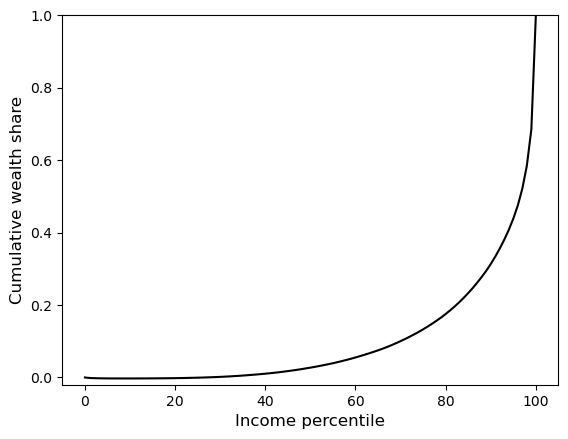

AttributeError: 'DoWMarket' object has no attribute 'center_estimate'

In [9]:
EstimationEconomy_bounds = estimate_r_upper_given_r_lower(options, parameters)

In [10]:
# Construct the Lorenz curves and plot them

pctiles = np.linspace(0.001, 0.999, 15)
SCF_Lorenz_points = get_lorenz_shares(
    SCF_wealth, weights=SCF_weights, percentiles=pctiles
)

sim_wealth = np.asarray(EstimationEconomy_bounds.reap_state["aLvl"]).flatten()
sim_Lorenz_points = get_lorenz_shares(sim_wealth, percentiles=pctiles)

NameError: name 'EstimationEconomy_bounds' is not defined

In [ ]:
# Plot
plt.figure(figsize=(5, 5))
plt.title("Wealth Distribution")
plt.plot(pctiles, SCF_Lorenz_points, "--k", label="SCF")
plt.plot(pctiles, sim_Lorenz_points, "-b", label="R-Dist")
plt.plot(pctiles, pctiles, "g-.", label="45 Degree")
plt.xlabel("Percentile of net worth")
plt.ylabel("Cumulative share of wealth")
plt.legend(loc=2)
plt.ylim([0, 1])
plt.show("wealth_distribution_2")